# <span style="color:#bcff8f"> Week 4 Assignment</span>

<span style="font-size:12pt;color:gray;font-weight:bold"> Patrick Weatherford</span><br>

<span style="font-size:16pt">Probability Distribution Functions</span>

- Probability Mass Function (PMF)
- Probability Density Function (PDF)
- Cumulative Distribution Function (CDF)

***
http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

***

<br>

<br>
Setting working directory to ThinkStats2 directory

In [6]:
import os

# changing working directory to ThinkStats2/code folder
path = os.path.expanduser('~') + '\\OneDrive - Bellevue University\\Bellevue_University\\DSC 530 - Data Exploration and Analysis\\ThinkStats2\\code'
os.chdir(path)

<br>

Importing libraries

In [7]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

<br>

***

## <span style="color:#c58fff">Exercise 3-1</span>

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

\----------

<br>

Loading dataset into variable `resp`.

In [8]:
resp = nsfg.ReadFemResp()

<br><br>

Mapping each value to its associated probability using the `Pmf` function from ThinkStats.

In [15]:
pmf = thinkstats2.Pmf(resp.numkdhh, label='actual')
pmf

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318}, 'actual')

<br><br>

Bar graph of Probability Mass Function (PMF).

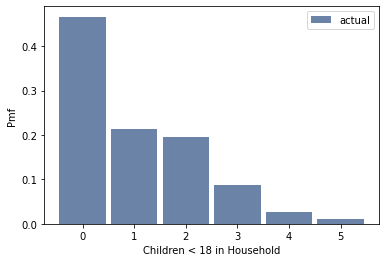

In [19]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Children < 18 in Household', ylabel='Pmf')

<br><br>

Step representation of Probability Mass Function (PMF).

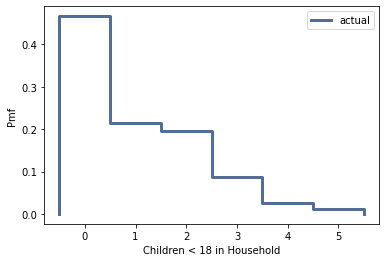

In [18]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Children < 18 in Household', ylabel='Pmf')

<br><br>

Creating bias function for dataset.

In [12]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

<br><br>

Creating a bias dataset using the bias function based on "size paradox".

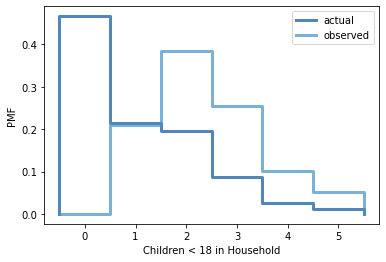

In [17]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Children < 18 in Household', ylabel='PMF')

<br><br>

Means of actual vs. bias datasets.

In [20]:
pmf.Mean()

1.024205155043831

In [21]:
biased_pmf.Mean()

2.403679100664282

<br>

***

## <span style="color:#c58fff">Exercise 3-2</span>

**Exercise:** In Summarizing Distributions we computed the mean of a sample by adding up the elements and dividing by n. If you are given a PMF, you can still compute the mean, but the process is slightly different:

$\bar{x}=\sum_{i}p_{i}x_{i}$

where the $x_{i}$ are the unique values in the PMF and $p_{i}=PMF(x_{i})$. Similarly, you can compute variance like this:

$s^{2}=\sum_{i}p_{i}(x_{i}-\bar{x})^2$

Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.

In [32]:
def PmfMean(pmf):
    mean = 0.0  # set mean variable to 0.0
    for x, p in pmf.d.items():  # iterate through pmf dict obj key(x) : value(probability) pairs
        mean += p * x  # for each each discrete value, sum the probability times the value
    return mean


def PmfVar(pmf):
    var = 0.0  # set variance variable to 0.0
    for x, p in pmf.d.items():  # iterate through pmf dict obj key(x) : value(probability) pairs
        var += p * (x - PmfMean(pmf)) ** 2  # for each each discrete value, sum the probability times the (value - mean)^2
    return var

    
print(f'''
PmfMean(pmf) = {PmfMean(pmf)}
pmf.Mean() = {pmf.Mean()}

PmfVar(pmf) = {PmfVar(pmf)}
pmf.Var() = {pmf.Var()}
''')


PmfMean(pmf) = 1.024205155043831
pmf.Mean() = 1.024205155043831

PmfVar(pmf) = 1.4128643263531195
pmf.Var() = 1.4128643263531195



<br>

***

## <span style="color:#c58fff">Exercise 4-1</span>

**Exercise:** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

<br>

Make dataframes.

In [85]:
live, firsts, others = first.MakeFrames()

<br><br>

Create variables for the weight column

In [90]:
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()

<br><br>

Create PercentileRank() function and Percentile() function.

In [91]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
            
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank


def Percentile(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]


<br><br>

Create function for the Cumulative Distribution Function (CDF). Pretty much the same as Percentile Rank but goes from 0-1 instead of 0-100.

In [92]:
def CDF(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
            
    prob = count / len(sample)
    return prob


<br><br>

Plot CDF of birth weight for non-first born babies.

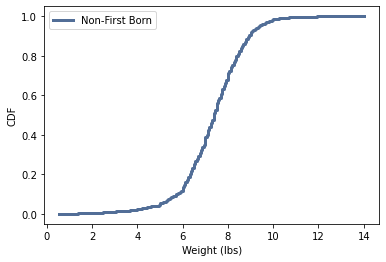

In [93]:
cdf = thinkstats2.Cdf(other_wgt, label='Non-First Born')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Weight (lbs)', ylabel='CDF', loc='upper left')


<br><br>

For the CDF object created based on baby weight (lb) for non-first born, you can use the .Prob() method to find the Percentile Rank of a particular weight. For me, I was a non-first born and weighed 8.1 lbs at birth. Below would be my Percentile Rank based on the sample data.

In [94]:
p_rank = int(round(100*cdf.Prob(8.1), 0))

print(f"My percentile rank for my birth weight for non-first born babies is {p_rank} meaning I do not have to call my Mom and apologize :).")

My percentile rank for my birth weight for non-first born babies is 72 meaning I do not have to call my Mom and apologize :).


<br><br>

Optionally, you can use .Value() method of the CDF object to get the Percentile based on an entered Percentile Rank specified.

In [95]:
cdf.Value(0.5)

7.375

<br>

***

## <span style="color:#c58fff">Exercise 4-2</span>

**Exercise:** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

***

PMF: Nothing went wrong with the PMF, it just isn't very interpretable when there are a lot of distinct values within in the sample which creates a lot of random noise. Also, the data is uniform so which makes it look like a big square. 

CDF: Looking at the plot, you can see that the data is uniform due to the straight diagonal lines that has no tails. This indicates that the data has no peak and is evenly distributed throughout the sample.

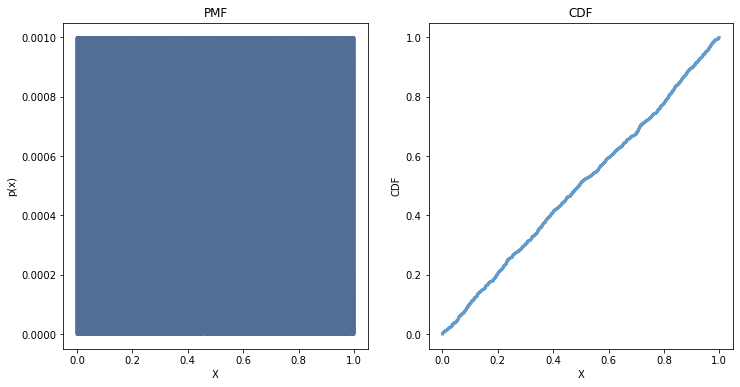

In [123]:
random_sample = np.random.random(1000)

pmf2 = thinkstats2.Pmf(random_sample)
cdf2 = thinkstats2.Cdf(random_sample)

thinkplot.preplot(cols=2)
thinkplot.pmf(pmf2)
thinkplot.config(xlabel='X', ylabel='p(x)', title='PMF')
thinkplot.subplot(2)
thinkplot.cdf(cdf2)
thinkplot.config(xlabel='X', ylabel='CDF', title='CDF')